# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities

Number of cities in the list: 633


['taiohae',
 'punta arenas',
 'petropavlovsk-kamchatsky',
 'grytviken',
 'udachny',
 'port-aux-francais',
 'puerto natales',
 'verdal',
 'gadzhiyevo',
 'hawaiian paradise park',
 'georgetown',
 'waitangi',
 'bethel',
 'college',
 'ilulissat',
 'adamstown',
 'kavaratti',
 'yellowknife',
 'isetskoye',
 'thompson',
 'longyearbyen',
 'shanhaiguan',
 'ust-nera',
 'hadibu',
 'rio grande',
 'grand falls-windsor',
 'rio gallegos',
 'filadelfia',
 'vorgashor',
 'papatowai',
 'airdrie',
 'kariba',
 'sao joao da barra',
 'bilibino',
 'kingston',
 'springbok',
 'manaure',
 'jintur',
 'san luis',
 'pandan',
 'iskateley',
 'iqaluit',
 'albany',
 'klyuchi',
 'port elizabeth',
 'wurno',
 'whitehorse',
 'alice springs',
 'atkinson',
 'badger',
 'invercargill',
 'lompoc',
 'quelimane',
 'wotho',
 'tanjung pinang',
 'chibougamau',
 'palangkaraya',
 'bredasdorp',
 'qaqortoq',
 'blythe',
 'bukittinggi',
 'itoman',
 'cargados carajos',
 'chiredzi',
 'codrington',
 'talnakh',
 'zvishavane',
 'sao felix do xi

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    cities_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         # Fetching data from API
        city_weather = requests.get(cities_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp -273,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | verdal
Processing Record 9 of Set 1 | gadzhiyevo
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | kavaratti
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | isetskoye
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | longyearbyen
Pr

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,1.21,86,40,14.92,CL,1712547117
1,petropavlovsk-kamchatsky,53.0452,158.6483,5.48,82,40,5.00,RU,1712547347
2,grytviken,-54.2811,-36.5092,2.18,71,2,2.53,GS,1712547310
3,udachny,66.4167,112.4000,-12.38,67,9,2.25,RU,1712547171
4,port-aux-francais,-49.3500,70.2167,5.53,62,75,8.02,TF,1712547336


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,1.21,86,40,14.92,CL,1712547117
1,petropavlovsk-kamchatsky,53.0452,158.6483,5.48,82,40,5.00,RU,1712547347
2,grytviken,-54.2811,-36.5092,2.18,71,2,2.53,GS,1712547310
3,udachny,66.4167,112.4000,-12.38,67,9,2.25,RU,1712547171
4,port-aux-francais,-49.3500,70.2167,5.53,62,75,8.02,TF,1712547336


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

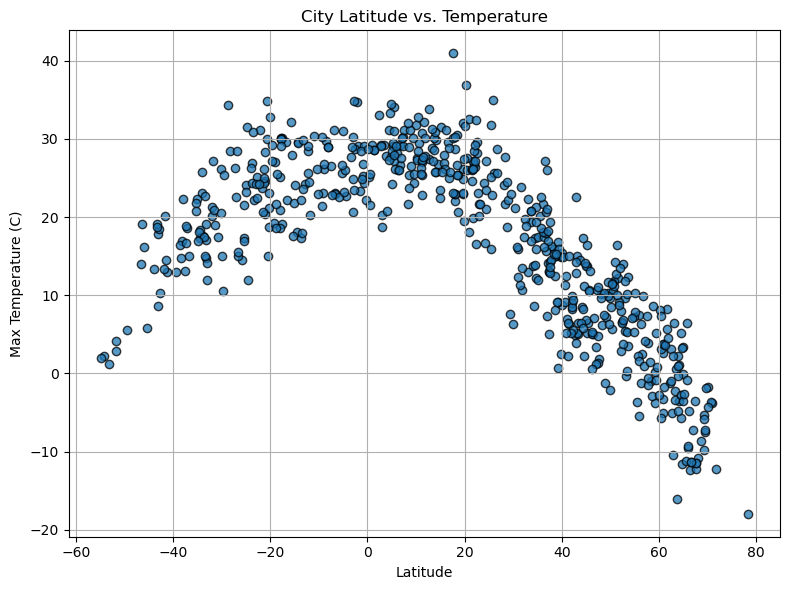

<Figure size 640x480 with 0 Axes>

In [38]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

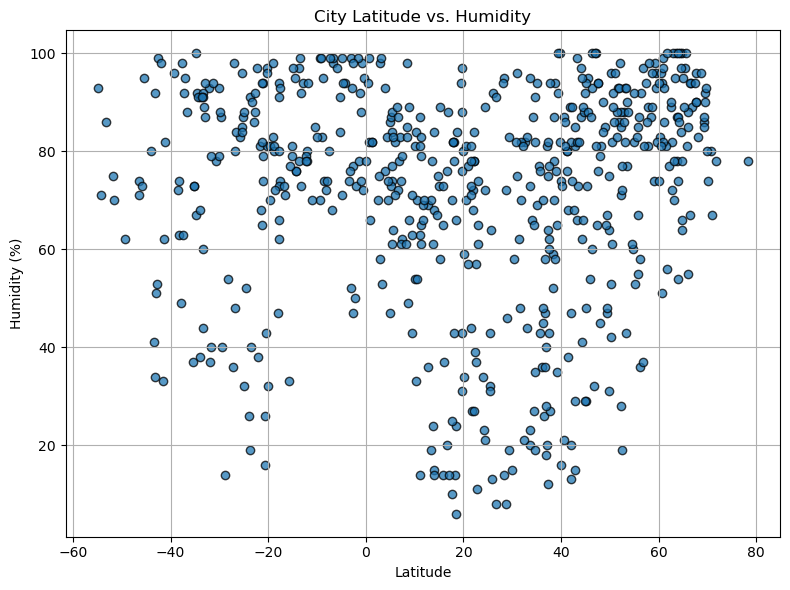

<Figure size 640x480 with 0 Axes>

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

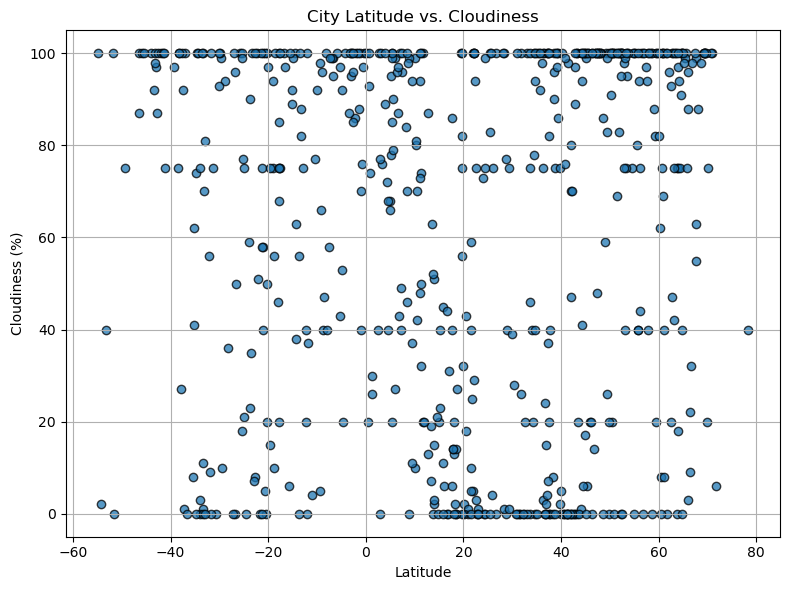

<Figure size 640x480 with 0 Axes>

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

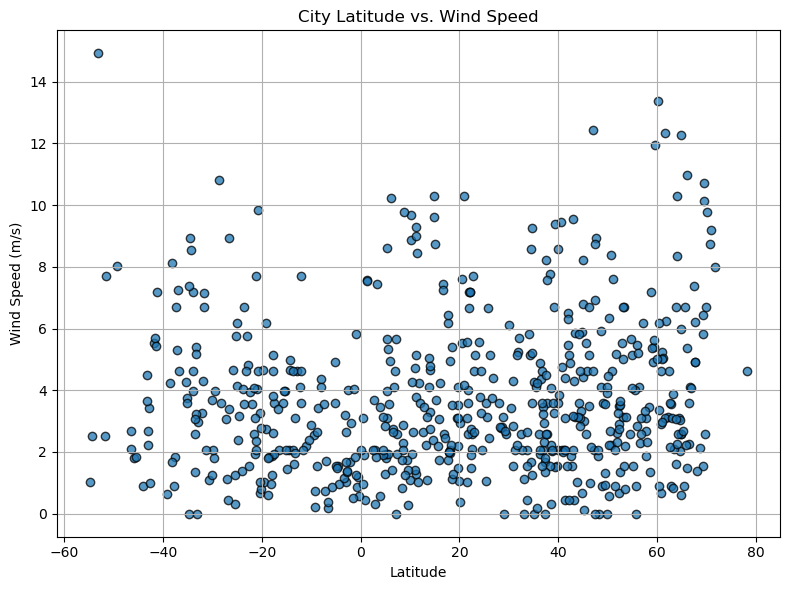

<Figure size 640x480 with 0 Axes>

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Annotate the line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.grid(True)
    plt.show()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0452,158.6483,5.48,82,40,5.00,RU,1712547347
3,udachny,66.4167,112.4000,-12.38,67,9,2.25,RU,1712547171
6,verdal,63.7933,11.4817,2.17,87,75,1.61,NO,1712547537
7,gadzhiyevo,69.2551,33.3362,-5.26,86,100,6.43,RU,1712547334
8,hawaiian paradise park,19.5933,-154.9731,22.95,94,100,3.09,US,1712547258


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,1.21,86,40,14.92,CL,1712547117
2,grytviken,-54.2811,-36.5092,2.18,71,2,2.53,GS,1712547310
4,port-aux-francais,-49.3500,70.2167,5.53,62,75,8.02,TF,1712547336
5,puerto natales,-51.7236,-72.4875,2.84,75,100,2.53,CL,1712547309
10,waitangi,-43.9535,-176.5597,13.38,80,100,0.89,NZ,1712547310


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8304296478736879


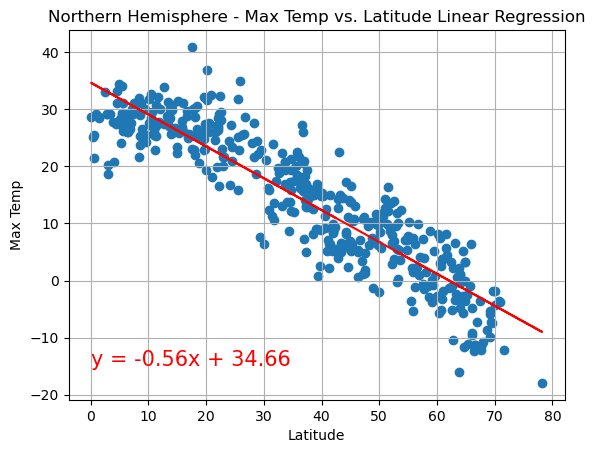

In [45]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       xlabel='Latitude', ylabel='Max Temp',
                       title='Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       text_coordinates=(0,-15))

The r-squared is: 0.4831868767553891


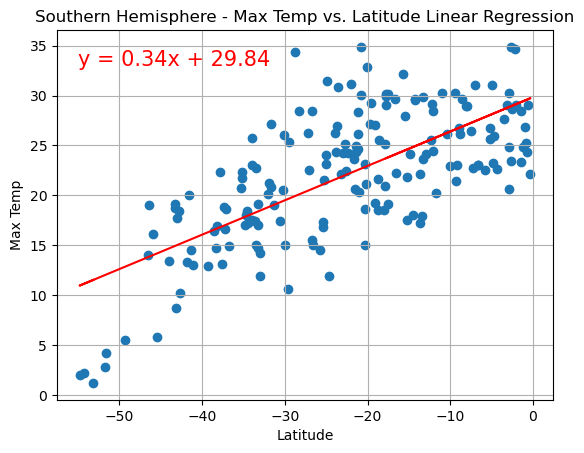

In [46]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       xlabel='Latitude', ylabel='Max Temp',
                       title='Southern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       text_coordinates=(-55,33))

**Discussion about the linear relationship:** THE LAST TWO CHARTS SHOWS THAT THE TEMPERATURE DECREASES AS YOU GO NORTH FROM THE EQUATOR, AND IT INCREASES AS YOU GO NORTH FROM THE ANTARTICA

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06762984367018529


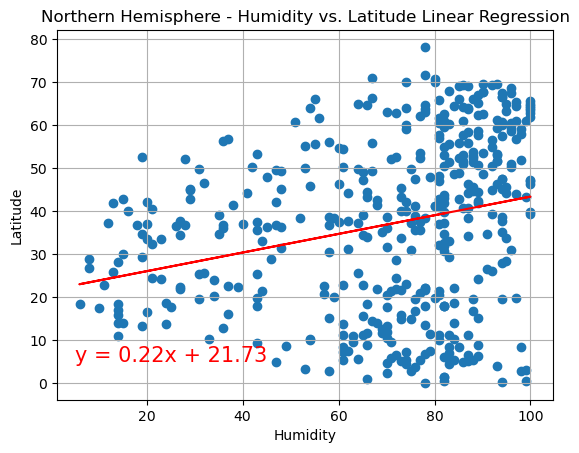

In [47]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Humidity"], northern_hemi_df["Lat"],
                       xlabel='Humidity', ylabel='Latitude',
                       title='Northern Hemisphere - Humidity vs. Latitude Linear Regression',
                       text_coordinates=(5,5))

The r-squared is: 0.03025365343599865


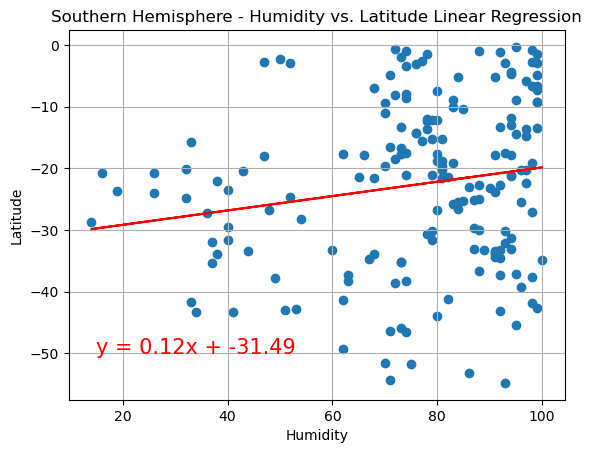

In [48]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Humidity"], southern_hemi_df["Lat"],
                       xlabel='Humidity', ylabel='Latitude',
                       title='Southern Hemisphere - Humidity vs. Latitude Linear Regression',
                       text_coordinates=(15,-50))

**Discussion about the linear relationship:** HUMIDITY INCREASES AS YOU APPROACH TO THE EQUATOR

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03762503742366268


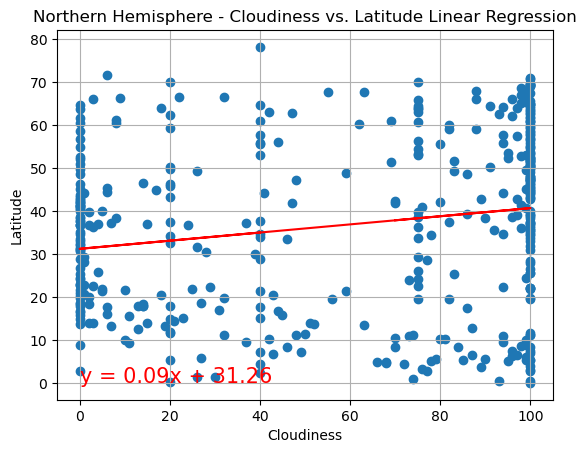

In [49]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"],
                       xlabel='Cloudiness', ylabel='Latitude',
                       title='Northern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       text_coordinates=(0,0))

The r-squared is: 0.007950577688391629


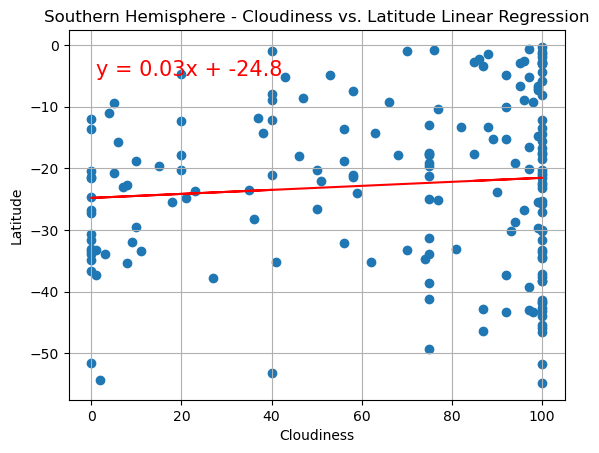

In [50]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"],
                       xlabel='Cloudiness', ylabel='Latitude',
                       title='Southern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       text_coordinates=(1,-5))

**Discussion about the linear relationship:** CLOUDINESS SLIGHTLY INCREASES AS YOU APPROACH TO THE EQUATOR

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013095598839158383


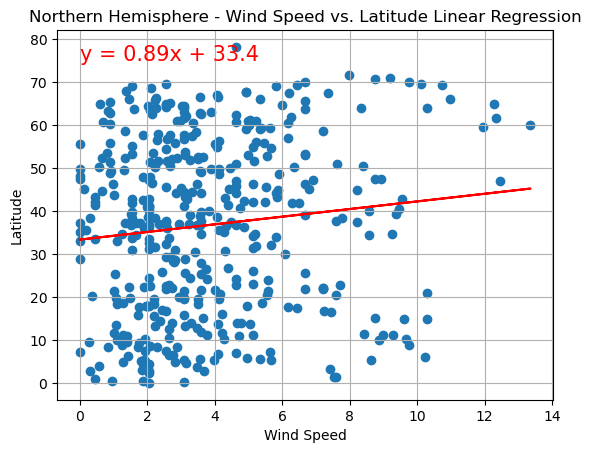

In [51]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"],
                       xlabel='Wind Speed', ylabel='Latitude',
                       title='Northern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                       text_coordinates=(0,75))

The r-squared is: 0.09781551606061231


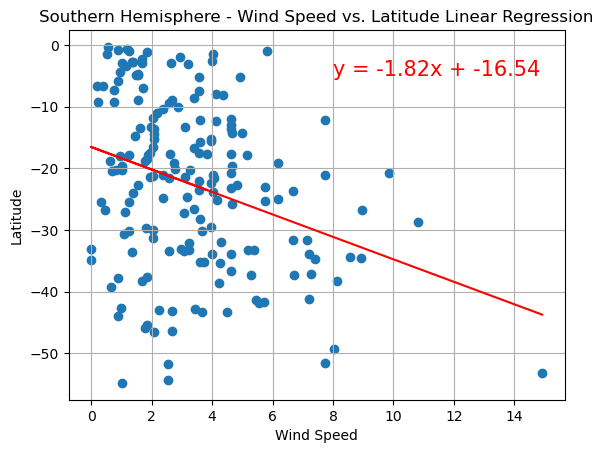

In [52]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"],
                       xlabel='Wind Speed', ylabel='Latitude',
                       title='Southern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                       text_coordinates=(8,-5))

**Discussion about the linear relationship:** WIND SPEED REDUCES AS YOU APPROACH TO THE EQUATOR